# 📝 Multilingual Tweet Intimacy Analysis - SemEval 2023 Task 9

#### 📦 Environment Setup and Library Imports

In [1]:

# Install PyTorch (CUDA 11.8, compatible with CUDA 12.2 on RTX 4070)
!pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu118

# Install Hugging Face and other required libraries
!pip install transformers datasets evaluate pandas scikit-learn matplotlib tqdm|

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu118
/bin/bash: -c: line 2: syntax error: unexpected end of file


This cell installs the required libraries for PyTorch (with CUDA support), Hugging Face Transformers, Datasets, Evaluate, Pandas, scikit-learn, Matplotlib, and tqdm. These are essential for model training, evaluation, and data processing.

In [2]:
import os
import pandas as pd
import numpy as np
import evaluate
import matplotlib.pyplot as plt
from tqdm import tqdm

from datasets import Dataset
from transformers import (
    AutoTokenizer, 
    AutoModelForSequenceClassification, 
    TrainingArguments, 
    Trainer
)

/home/aisd/miniconda3/envs/tweetintimacy/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


This cell imports all the necessary Python libraries and modules for data manipulation, visualization, evaluation, and model training using Hugging Face Transformers and Datasets.

### Download Dataset

In [3]:
# Create data directory
!mkdir -p data

This cell creates a directory named 'data' if it does not already exist. This directory will be used to store the training and test datasets.

In [4]:
# Download train and test CSVs with original filenames from source
#!wget -P data/ "https://codalab.lisn.upsaclay.fr/my/datasets/download/a5556004-d13b-4e3d-bc00-e470a954ffbb"
#!wget -P data/ "https://codalab.lisn.upsaclay.fr/my/datasets/download/fbe23c02-0407-4d0b-999b-adbf45ca536e"

This cell contains (commented) commands to download the training and test CSV files from the official SemEval 2023 Task 9 dataset source. Uncomment and run if you need to fetch the data.

## Load and Explore Dataset

In [60]:
train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/semeval_test.csv")

print("Train Shape:", train_df.shape)
print("Test Shape:", test_df.shape)
train_df.head()

Train Shape: (9491, 3)
Test Shape: (13697, 2)


,text,label,language
0,wearing a fake engagement ring so guys won’t a...,1.8,English
1,Bees vs. Wasps. http,1.0,English
2,Here is a nice equation: 0+0-0-0+0=0,1.0,English
3,@user @user Enjoy each new day!😊🇨🇦🐞🐭,1.6,English
4,I can be having a perfectly good day then I th...,1.6,English


This cell loads the training and test datasets from CSV files into pandas DataFrames and displays their shapes and the first few rows of the training set.

Train Columns: Index(['text', 'label', 'language'], dtype='object')
Test Columns: Index(['text', 'language'], dtype='object')
Train Intimacy Distribution:
 label
1.000000    1346
2.000000     818
1.400000     574
1.600000     557
1.200000     556
1.800000     516
2.200000     470
3.000000     462
2.400000     395
2.600000     373
2.800000     332
1.250000     324
1.500000     313
1.750000     260
3.200000     248
2.250000     202
3.400000     190
3.600000     168
2.500000     154
2.750000     145
3.800000     138
4.000000     130
3.250000     101
1.333333      98
1.666667      86
4.200000      84
3.500000      82
4.400000      57
3.750000      52
2.333333      45
2.666667      36
4.600000      32
4.250000      28
3.333333      25
4.800000      24
5.000000      22
4.500000      16
4.750000      13
3.666667       9
4.333333       5
4.666667       5
Name: count, dtype: int64
Test Language Distribution:
 language
Korean        1410
English       1396
Spanish       1396
Portuguese    1390
D

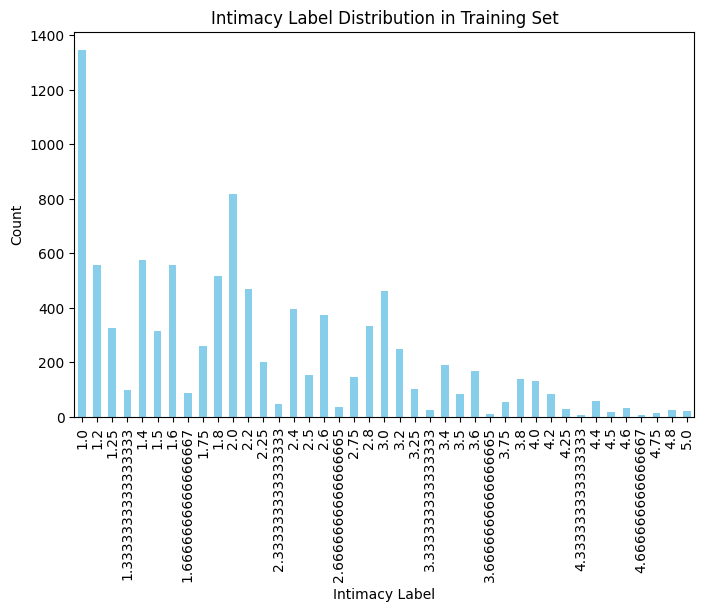

In [59]:
# Check the columns in the train and test dataframes and visualize the distribution of data
print("Train Columns:", train_df.columns)
print("Test Columns:", test_df.columns)
print("Train Intimacy Distribution:\n", train_df['label'].value_counts())
# The test set does not have 'label', so we can show language distribution instead
print("Test Language Distribution:\n", test_df['language'].value_counts())

# Visualize the distribution of intimacy labels in the training set
plt.figure(figsize=(8, 5))
train_df['label'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Intimacy Label Distribution in Training Set')
plt.xlabel('Intimacy Label')
plt.ylabel('Count')
plt.show()

This cell explores the columns in the training and test datasets, prints label and language distributions, and visualizes the distribution of intimacy labels in the training set using a bar plot.

# Login to Hugging Face to access gated models

In [ ]:
from huggingface_hub import login
login(token="YOUR_HUGGING_FACE_TOKEN")  # Replace with your Hugging Face token

This cell logs in to the Hugging Face Hub using your access token. This is required to access gated models and datasets from the Hugging Face Model Hub.

# Preprocess Text and Tokenize

In [57]:
model_ckpt = "xlm-roberta-large"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

# Convert pandas to Hugging Face dataset
dataset = Dataset.from_pandas(train_df)

# Tokenization function
def tokenize(batch):
    return tokenizer(batch["text"], padding="max_length", truncation=True, max_length=128)

encoded_dataset = dataset.map(tokenize, batched=True)

Map: 100%|██████████| 9491/9491 [00:01<00:00, 7013.06 examples/s]


This cell sets up the model checkpoint, loads the tokenizer, converts the training DataFrame to a Hugging Face Dataset, and tokenizes the text data for model input.

In [56]:
!pip install --upgrade transformers

This cell upgrades the Hugging Face Transformers library to the latest version to ensure compatibility and access to the newest features and bug fixes.

In [55]:
# Install the latest versions of Hugging Face libraries and their dependencies
!pip install -U transformers accelerate evaluate
!pip install "transformers[torch]"

This cell installs or updates the latest versions of Hugging Face Transformers, Accelerate, and Evaluate libraries, ensuring all dependencies are up to date for model training and evaluation.

In [54]:
#!pip install transformers==4.42.4
#!pip install "accelerate>=0.21.0"
#!pip install transformers[torch] --upgrade
# ✅ Install required dependencies for Hugging Face Trainer
#!pip install -U accelerate
#!pip install "transformers[torch]" -U
#!pip install evaluate
#!pip install accelerate

This cell contains optional (commented) installation commands for specific versions of Transformers, Accelerate, and Evaluate libraries. Use these if you need to match a particular version or resolve compatibility issues.

## Load Model and Training Arguments


In [53]:
import torch
import gc
if 'model' in globals():
    del model
torch.cuda.empty_cache()
gc.collect()

3266

This cell clears any previously loaded models from GPU memory, empties the CUDA cache, and performs garbage collection to free up resources before loading a new model.

In [ ]:
import os
# CRITICAL: Set these BEFORE any other imports
os.environ["CUDA_VISIBLE_DEVICES"] = "1"  # Use only GPU 1
os.environ["TOKENIZERS_PARALLELISM"] = "false"  # Fix tokenizer warning
os.environ["NCCL_P2P_DISABLE"] = "1"
os.environ["NCCL_IB_DISABLE"] = "1"

import torch
import pandas as pd
import numpy as np
import evaluate
from datasets import Dataset
from transformers import (
    AutoTokenizer, 
    AutoModelForSequenceClassification, 
    TrainingArguments, 
    Trainer,
    EarlyStoppingCallback
)

# Verify uses of  GPU 1 (will show as device 0 because of CUDA_VISIBLE_DEVICES)
print(f"CUDA Available: {torch.cuda.is_available()}")
print(f"Number of visible GPUs: {torch.cuda.device_count()}")
print(f"Current device: {torch.cuda.current_device()}")
print(f"Device name: {torch.cuda.get_device_name(0)}")  # This is actually GPU 1
print(f"GPU Memory: {torch.cuda.get_device_properties(0).total_memory / 1e9:.1f} GB")
print(f"GPU Memory Used: {torch.cuda.memory_allocated(0) / 1e9:.2f} GB")

# Using existing variables:
# - encoded_dataset (already created)
# - tokenizer (already loaded) 
# - model_ckpt = "xlm-roberta-large" (already set)
# - train_df, test_df (already loaded)

print(f"\n✅ Using existing encoded_dataset with {len(encoded_dataset)} samples")
print(f"✅ Using existing tokenizer for {model_ckpt}")
print(f"✅ Using existing train_df: {train_df.shape}")
print(f"✅ Using existing test_df: {test_df.shape}")

CUDA Available: True
Number of visible GPUs: 1
Current device: 0
Device name: NVIDIA GeForce RTX 4070
GPU Memory: 12.6 GB
GPU Memory Used: 0.00 GB

✅ Using existing encoded_dataset with 9491 samples
✅ Using existing tokenizer for xlm-roberta-large
✅ Using existing train_df: (9491, 3)
✅ Using existing test_df: (13697, 2)


This cell sets environment variables to control GPU usage and tokenizer parallelism, then verifies the GPU setup and prints information about the available GPU and memory.

In [21]:
# 1. DATA DIAGNOSTICS & FIXES
# ========================================
print("🔍 Step 1: Checking and fixing data...")

# Check what columns we have
print(f"Dataset columns: {encoded_dataset.column_names}")
print(f"Train_df columns: {train_df.columns.tolist()}")

# Check label column and stats
if 'label' in train_df.columns:
    label_col = 'label'
elif 'intimacy' in train_df.columns:
    label_col = 'intimacy'
else:
    print("❌ No clear label column found!")
    print("Available columns:", train_df.columns.tolist())
    # Let user specify the correct column name
    label_col = input("Enter the correct label column name: ")

print(f"\nUsing label column: '{label_col}'")
print(f"Label stats:")
print(train_df[label_col].describe())

# Fix label column name in dataset
if 'labels' not in encoded_dataset.column_names:
    if label_col in encoded_dataset.column_names:
        encoded_dataset = encoded_dataset.rename_column(label_col, 'labels')
        print(f"✅ Renamed '{label_col}' to 'labels'")
    else:
        print(f"❌ Column '{label_col}' not found in encoded_dataset")

🔍 Step 1: Checking and fixing data...
Dataset columns: ['text', 'labels', 'language', 'input_ids', 'attention_mask']
Train_df columns: ['text', 'label', 'language']

Using label column: 'label'
Label stats:
count    9491.000000
mean        2.093782
std         0.903512
min         1.000000
25%         1.400000
50%         2.000000
75%         2.666667
max         5.000000
Name: label, dtype: float64


This cell performs data diagnostics, checks for the correct label column, prints label statistics, and ensures the label column is properly named for model training.

In [ ]:

# Load model on GPU 
print(f"\n📥 Loading {model_ckpt}...")
model = AutoModelForSequenceClassification.from_pretrained(model_ckpt, num_labels=1)

# Evaluation metric
pearson = evaluate.load("pearsonr")

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.squeeze(predictions)
    return pearson.compute(predictions=predictions, references=labels)

# Train arguments
training_args = TrainingArguments(
    output_dir="./no_num_pretrain_model",
    overwrite_output_dir=True,
    num_train_epochs=3,
    per_device_train_batch_size=16,     
    per_device_eval_batch_size=32,      
    do_train=True,
    do_eval=True,
    eval_strategy="steps",
    logging_steps=10,
    save_steps=2000,
    eval_steps=10,
    load_best_model_at_end=True,
    metric_for_best_model="eval_pearsonr",
    greater_is_better=True,
    fp16=True,                         # Still use mixed precision for speed
)

# Early stopping
early_stopping = EarlyStoppingCallback(
    early_stopping_patience=3,
    early_stopping_threshold=0.001
)

print("\n✅ Setup complete on GPU 1!")
print("🚀 Ready to train with xlm-roberta-large on the free GPU!")


📥 Loading xlm-roberta-large...


Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-large and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



✅ Setup complete on GPU 1!
🚀 Ready to train with xlm-roberta-large on the free GPU!


This cell loads the XLM-RoBERTa model for sequence classification, sets up the Pearson correlation metric, defines the compute_metrics function, and configures the training arguments and early stopping callback.

In [30]:
# 🚀 7. Train the Model
print("🚀 Starting training...")
# After running the setup code above:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=encoded_dataset,
    eval_dataset=encoded_dataset.train_test_split(test_size=0.1, seed=42)["test"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
    callbacks=[early_stopping],
)

trainer.train()

🚀 Starting training...


/tmp/ipykernel_446901/3410002312.py:4: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
/home/aisd/miniconda3/envs/tweetintimacy/lib/python3.9/site-packages/torch/nn/modules/module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `XLMRobertaSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


Step,Training Loss,Validation Loss,Pearsonr
200,0.903600,0.896385,0.201625
400,0.721700,0.634376,0.576613
600,0.538800,0.456380,0.672376
800,0.531400,0.452519,0.693351
1000,0.526600,0.437158,0.696762
1200,0.409200,0.462118,0.705178
1400,0.558500,0.441148,0.731410
1600,0.494600,0.329584,0.753754
1800,0.418600,0.328061,0.766775
2000,0.447100,0.326795,0.769994


/home/aisd/miniconda3/envs/tweetintimacy/lib/python3.9/site-packages/torch/nn/modules/module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `XLMRobertaSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)
/home/aisd/miniconda3/envs/tweetintimacy/lib/python3.9/site-packages/torch/nn/modules/module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `XLMRobertaSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)
/home/aisd/miniconda3/envs/tweetintimacy/lib/python3.9/site-packages/torch/nn/modules/module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `XLMRobertaSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)
/home/aisd/miniconda3/envs/tweetintimacy/lib/python3.9/site-packages/torch/nn/modules/module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be remo

TrainOutput(global_step=5935, training_loss=0.4225232918923305, metrics={'train_runtime': 1879.6622, 'train_samples_per_second': 25.247, 'train_steps_per_second': 3.157, 'total_flos': 1.105616335510656e+16, 'train_loss': 0.4225232918923305, 'epoch': 5.0})

This cell initializes the Hugging Face Trainer with the model, training arguments, datasets, tokenizer, metrics, and early stopping callback, then starts the model training process.

Evaluate Model on the Official Test Set

In [32]:
# Convert the test dataframe to a Hugging Face Dataset
test_dataset = Dataset.from_pandas(test_df)

# Tokenize the test dataset
# Note: The test set doesn't have a 'label' column, which is fine for prediction.
encoded_test_dataset = test_dataset.map(tokenize, batched=True)

# Remove the text column as the model doesn't need it anymore
encoded_test_dataset = encoded_test_dataset.remove_columns(['text', 'language'])


print("✅ Test dataset is ready for prediction.")
print(encoded_test_dataset)

Map: 100%|██████████| 13697/13697 [00:02<00:00, 6623.81 examples/s]

✅ Test dataset is ready for prediction.
Dataset({
    features: ['input_ids', 'attention_mask'],
    num_rows: 13697
})


This cell converts the test DataFrame to a Hugging Face Dataset, tokenizes the test data, removes unnecessary columns, and prepares the test set for generating predictions.

# Generate Predictions

In [33]:
# Generate predictions
print("🚀 Generating predictions on the test set...")
predictions = trainer.predict(encoded_test_dataset)

# The output is a PredictionOutput object, which contains predictions, label_ids (if any), and metrics.
# For regression, the predictions will be in a numpy array.
predicted_scores = predictions.predictions.squeeze()

print("✅ Predictions generated successfully!")
print("Shape of predictions:", predicted_scores.shape)
print("First 5 predicted scores:", predicted_scores[:5])

🚀 Generating predictions on the test set...


/home/aisd/miniconda3/envs/tweetintimacy/lib/python3.9/site-packages/torch/nn/modules/module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `XLMRobertaSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Predictions generated successfully!
Shape of predictions: (13697,)
First 5 predicted scores: [2.3144531 1.4882812 2.953125  1.4306641 2.859375 ]


This cell uses the trained model to generate predicted intimacy scores for the test set and displays the shape and a preview of the predictions.

In [39]:
#Save  Final Model and Tokenizer
# Define a path to save the final model
final_model_path = "./final_model"

# Save the model and tokenizer
trainer.save_model(final_model_path)
tokenizer.save_pretrained(final_model_path)

print(f"✅ Final model and tokenizer saved to {final_model_path}")

✅ Final model and tokenizer saved to ./final_model


This cell saves the trained model and tokenizer to the specified directory so they can be reloaded and used for inference or further training later.

In [ ]:
#load it back anytime
# from transformers import AutoTokenizer, AutoModelForSequenceClassification

# loaded_model = AutoModelForSequenceClassification.from_pretrained(final_model_path)
# loaded_tokenizer = AutoTokenizer.from_pretrained(final_model_path)

This cell provides example code (commented) for reloading the saved model and tokenizer from disk for future inference or continued training.

In [62]:
# Check if 'id' column exists, if not, create it from the index
print("Columns before check:", test_df.columns.tolist())
if 'id' not in test_df.columns:
    print("-> 'id' column not found. Creating one from the DataFrame index.")
    test_df.reset_index(inplace=True)
    test_df.rename(columns={'index': 'id'}, inplace=True)
    print("-> 'id' column created successfully.")

print("\nColumns after check:", test_df.columns.tolist())
print("\nPreview of test_df with 'id' column:")
print(test_df.head())

Columns before check: ['text', 'language']
-> 'id' column not found. Creating one from the DataFrame index.
-> 'id' column created successfully.

Columns after check: ['id', 'text', 'language']

Preview of test_df with 'id' column:
   id                                               text language
0   0                           @user الأشقياء الطيبين 🤭   Arabic
1   1                               @user Un caffè? ☕😁😁😁  Italian
2   2         @user girl!! we support u no matter what 😚  English
3   3                                          @user 아..   Korean
4   4  @user @user Pouaaaah jle chantais taleur arrêt...   French


This cell checks if the test DataFrame has an 'id' column, and if not, creates one from the index. This is necessary for matching predictions to the original test samples.

In [63]:
# This assumes 'predicted_scores' exists from your trainer.predict() step
test_df['predicted_intimacy'] = predicted_scores

print("✅ 'predicted_intimacy' column added.")
print("\nPreview of test_df with predictions:")
# Display the id, text, and new prediction columns
print(test_df[['id', 'text', 'predicted_intimacy']].head())


✅ 'predicted_intimacy' column added.

Preview of test_df with predictions:
   id                                               text  predicted_intimacy
0   0                           @user الأشقياء الطيبين 🤭            2.314453
1   1                               @user Un caffè? ☕😁😁😁            1.488281
2   2         @user girl!! we support u no matter what 😚            2.953125
3   3                                          @user 아..            1.430664
4   4  @user @user Pouaaaah jle chantais taleur arrêt...            2.859375


This cell adds the predicted intimacy scores to the test DataFrame and displays a preview of the results, including the id, text, and predicted intimacy columns.

In [65]:
import os
import pandas as pd

# Define the output directory and filename
output_dir = 'outputs'
submission_filename = 'test_predictions.csv'
submission_path = os.path.join(output_dir, submission_filename)

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"Directory created: {output_dir}")

# Select the required columns for the submission, including 'text'
submission_df = test_df[['id', 'text', 'predicted_intimacy']]

# Save the result to a CSV file
submission_df.to_csv(submission_path, index=False)

print(f"\n✅ Submission file created successfully at: {submission_path}")

# --- Verification Step ---
# Let's read the file we just created to make sure it's correct
print("\n--- Verifying the final submission file ---")
final_check_df = pd.read_csv(submission_path)
print(final_check_df.head())


✅ Submission file created successfully at: outputs/test_predictions.csv

--- Verifying the final submission file ---
   id                                               text  predicted_intimacy
0   0                           @user الأشقياء الطيبين 🤭            2.314453
1   1                               @user Un caffè? ☕😁😁😁            1.488281
2   2         @user girl!! we support u no matter what 😚            2.953125
3   3                                          @user 아..            1.430664
4   4  @user @user Pouaaaah jle chantais taleur arrêt...            2.859375


This cell saves the test DataFrame with predicted intimacy scores to a CSV file in the outputs directory, and verifies the saved file by reading and displaying its contents.